## British Airways Reviews Analysis

This notebook walks through the process of analyzing BA passenger reviews from a dataset using Python. We will clean the text data, explore sentiment and topic insights, and generate visualizations such as word clouds.


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load data
df = pd.read_csv("data/BA_reviews.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karthikbalajisirimilla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthikbalajisirimilla/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,reviews
0,✅ Trip Verified | I had an appalling experie...
1,"Not Verified | Good points, the cabin crew, t..."
2,"Not Verified | It was a decent flight, reason..."
3,✅ Trip Verified | I really like flying Briti...
4,✅ Trip Verified | Could not book online the ...


## Data Cleaning
We will clean the reviews by removing special characters, converting to lowercase, and eliminating stopwords.

In [2]:

def clean_text(text):
    text = re.sub(r'✅ Trip Verified|Not Verified', '', text)  # Remove verification tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

df['cleaned'] = df['reviews'].apply(clean_text)
df[['reviews', 'cleaned']].head()

,reviews,cleaned
0,✅ Trip Verified | I had an appalling experie...,i had an appalling experience with british air...
1,"Not Verified | Good points, the cabin crew, t...",good points the cabin crew they were helpful p...
2,"Not Verified | It was a decent flight, reason...",it was a decent flight reasonable comfortable ...
3,✅ Trip Verified | I really like flying Briti...,i really like flying british airways particula...
4,✅ Trip Verified | Could not book online the ...,could not book online the night before because...


## Word Cloud
Visualize the most frequent terms mentioned in the reviews.

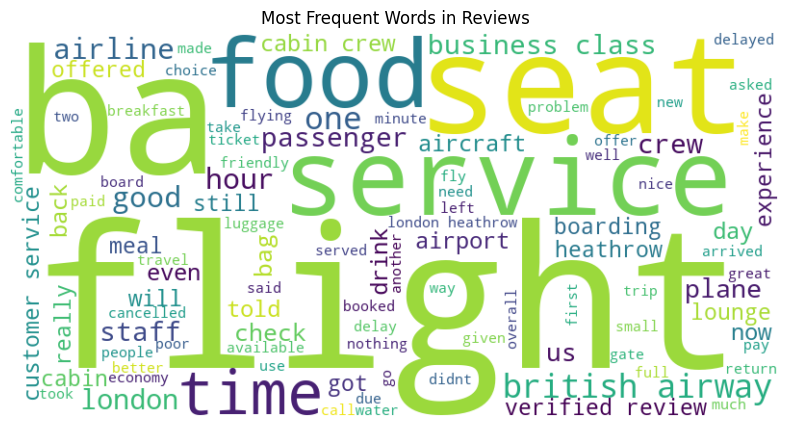

In [3]:
stop_words = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stop_words, max_words=100).generate(' '.join(df['cleaned']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Reviews")
plt.show()


- This visualization gives a clear first impression: passengers care deeply about service quality, timing, comfort, and food. These areas are worth investigating further with sentiment analysis or targeted improvements.

## Sentiment Analysis

Use TextBlob to estimate polarity of each review.

/var/folders/71/vwpph_bx1fl1p45xk0g342_w0000gn/T/ipykernel_59197/2111004003.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


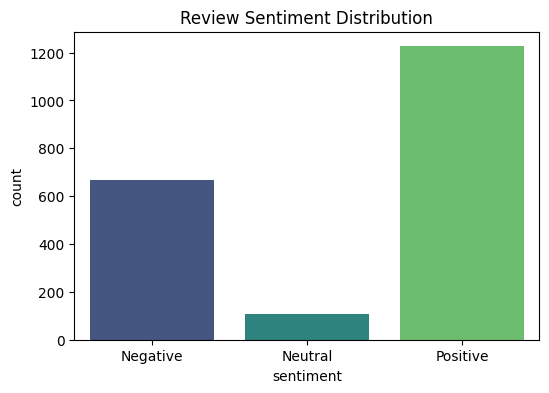

In [4]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['cleaned'].apply(get_sentiment)
df['sentiment'] = pd.cut(df['polarity'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Review Sentiment Distribution")
plt.show()


## Topic Modeling

Discover the most common topics discussed using LDA.

In [5]:
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
X = vectorizer.fit_transform(df['cleaned'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_terms = [terms[j] for j in topic.argsort()[-10:]]
    print(f"Topic {i+1}: {', '.join(top_terms)}")

Topic 1: club, lounge, time, cabin, service, food, ba, crew, good, flight
Topic 2: london, food, flight, service, economy, seats, business, seat, ba, class
Topic 3: boarding, luggage, passengers, time, service, food, staff, plane, ba, flight
Topic 4: delayed, time, crew, heathrow, ba, staff, airways, british, london, flight
Topic 5: airways, london, british, hours, cancelled, told, service, customer, ba, flight
